<a href="https://colab.research.google.com/github/RodrigoNPereira/ninja-project-rodrigo/blob/main/ninja_project_rodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Technical case - Data Ninja
Rodrigo Nascimento Pereira - Federal University of Itajubá

This code analyzes data from TheLook E-commerce public dataset on BigQuery. It offers basic insights and visualizations on order behavior and cancellation rates.

**Funcitionality**

The beggining of the structure was made for connecting to the BigQuery via credentials and being able to retriving the dataset for quick vizualization and the whole set for data analysis.

After this step, with the help of matplotlib-pyplot and pandas, it's possible to obtain graphs and show the data in a intiuitive form.

**Instructions of use**

For a personal experience and further study with data analysis, you must update the project ID with your own and changing the credentials as well. All of this is possible by creating a Google Cloud account and creating a new project.

In [ ]:
!pip install google-cloud-bigquery

In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account

In [ ]:
credentials = service_account.Credentials.from_service_account_file('/content/rodrigo-ninja-project-779b537cf084.json')
project_id = 'rodrigo-ninja-project' # change for your own project ID
client = bigquery.Client(credentials= credentials,project=project_id)

In [ ]:
query = client.query(
    """
    SELECT * FROM
    `bigquery-public-data.thelook_ecommerce.orders`
    LIMIT 10
    """)
results = query.result()
for row in results:
	print(row)

Row((66, 50, 'Cancelled', 'F', datetime.datetime(2022, 8, 3, 2, 38, tzinfo=datetime.timezone.utc), None, None, None, 1), {'order_id': 0, 'user_id': 1, 'status': 2, 'gender': 3, 'created_at': 4, 'returned_at': 5, 'shipped_at': 6, 'delivered_at': 7, 'num_of_item': 8})
Row((79, 59, 'Cancelled', 'F', datetime.datetime(2023, 2, 27, 10, 40, tzinfo=datetime.timezone.utc), None, None, None, 4), {'order_id': 0, 'user_id': 1, 'status': 2, 'gender': 3, 'created_at': 4, 'returned_at': 5, 'shipped_at': 6, 'delivered_at': 7, 'num_of_item': 8})
Row((84, 64, 'Cancelled', 'F', datetime.datetime(2020, 11, 4, 9, 45, tzinfo=datetime.timezone.utc), None, None, None, 2), {'order_id': 0, 'user_id': 1, 'status': 2, 'gender': 3, 'created_at': 4, 'returned_at': 5, 'shipped_at': 6, 'delivered_at': 7, 'num_of_item': 8})
Row((110, 86, 'Cancelled', 'F', datetime.datetime(2023, 8, 2, 18, 55, tzinfo=datetime.timezone.utc), None, None, None, 4), {'order_id': 0, 'user_id': 1, 'status': 2, 'gender': 3, 'created_at': 4, 

In [ ]:
query2 = client.query(
    """
    SELECT * FROM
    `bigquery-public-data.thelook_ecommerce.orders`
    ORDER BY created_at ASC
    """
)

### Data Analysis
<br>
<br>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = query2.to_dataframe()
df['month'] = df['created_at'].dt.month

<Figure size 1000x600 with 0 Axes>

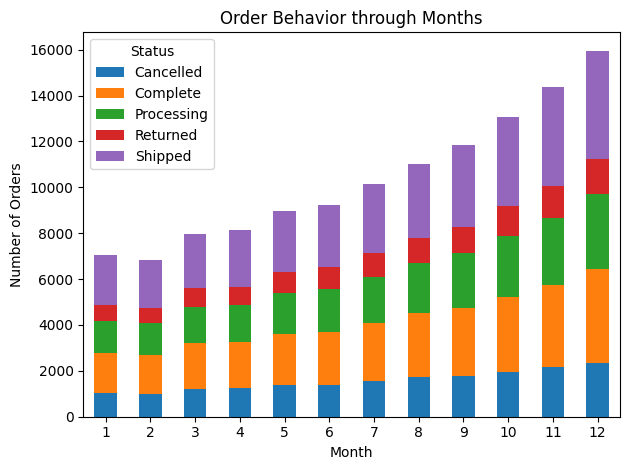

Total orders per month:
month
1      7057
2      6820
3      7970
4      8142
5      8975
6      9230
7     10163
8     11030
9     11847
10    13045
11    14386
12    15959
dtype: int64
Average orders per month:
month
1      588.083333
2      568.333333
3      664.166667
4      678.500000
5      747.916667
6      769.166667
7      846.916667
8      919.166667
9      987.250000
10    1087.083333
11    1198.833333
12    1329.916667
dtype: float64


In [ ]:
# Group orders by month and status
order_counts = df.groupby(["month", "status"]).size().unstack(fill_value=0)

# Create a stacked bar chart to visualize order counts by month and status
plt.figure(figsize=(10, 6))
order_counts.plot(kind="bar", stacked=True)
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Order Behavior through Months")
plt.legend(title="Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate additional statistics (optional)
total_orders_per_month = order_counts.sum(axis=1)
average_orders_per_month = total_orders_per_month / len(df["month"].unique())

# Print additional insights
print(f"Total orders per month:\n{total_orders_per_month}")
print(f"Average orders per month:\n{average_orders_per_month}")

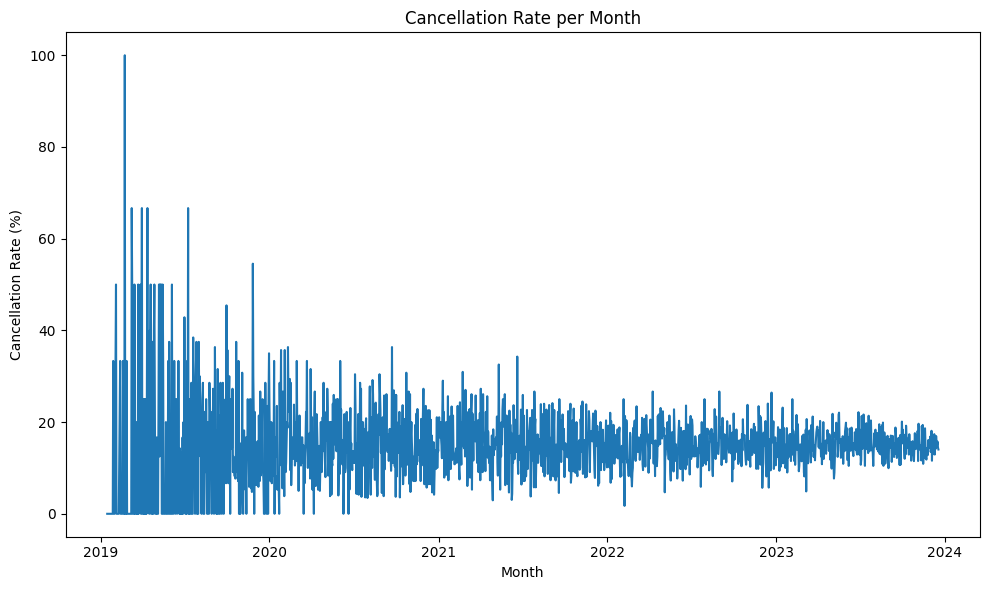

In [ ]:
query3 = client.query(
   """
  SELECT
  CAST(created_at AS DATE) AS year,
  CAST(created_at AS DATE) AS month,
  COUNT(*) AS total_orders,
  SUM(CASE WHEN status = 'Cancelled' THEN 1 ELSE 0 END) AS cancelled_orders
  FROM `bigquery-public-data.thelook_ecommerce.orders`
  GROUP BY year, month
  ORDER BY year ASC, month ASC;

"""
)

# Load results into pandas DataFrame
df3 = query3.to_dataframe()

# Calculate cancellation rate
df3["cancellation_rate"] = (df3["cancelled_orders"] / df3["total_orders"]) * 100

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(df3["month"], df3["cancellation_rate"])
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate per Month")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
